In [2]:
from math import sqrt, pow, pi
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ConnectionPatch
import numpy as np
%matplotlib inline

## Overview
Calculate orbital characteristics from observed exoplanet data (see inputs below). This example uses Kepler-20b information.
Useful for visualizing orbits and determining whether they fall into the habital zone.

## References
* Cumming, A., Marcy, G. W., & Butler, R. P. 1999, ApJ, 526, 890
* Kasting, J. F., Whitmire, D. P., & Reynolds, R. T. 1993, Icarus, 101, 108
* Perryman, M. 2011, The Exoplanet Handbook, Cambridge University Press, New York; ISBN: 0521765595
* Exoplanet Archive, https://exoplanetarchive.ipac.caltech.edu
* Exoplanets.org data, http://exoplanets.org/table 

In [9]:
# Kepler-20b values
# M☉ = (1.98855±0.00025)×10^30 kg mass of Sol
#constants
solrad = 0.00465047 # Sol radius in au
juprad = 0.000477895 # Jupiter radius in au

# observation inputs
d = 290 # distance in parsecs to stellar body - ps = 648000 au / 𝛑
msun = 0.912 # mass of stellar body in sol unit
srad = 0.944 # stellar radius in sol unit
teff = 5466  # effective stellar temp in k (black body)
a = .04537  # semi major axis of orbit in au
msini = 0.0266 # mass of planet in jupiter units
prad = 0.170 # planetary radius in jupiter units
e = 0 # orbital eccentricity

# given observation values - useful for checking derived calcs below
period = 3.6961219 # orbital period in earth days (365.25 per year)
radv = 3.7 # radial velocity m/s semiamplitude

# derived orbital and stellar values.
orbital_period_years = sqrt(pow(a,3)*(1/msun))
orbital_period_days = orbital_period_years * 365.25
t1 = 203*pow(orbital_period_days,-1.0/3.0)
t2 = msini / pow(msun+9.548e-4*msini,2.0/3.0)
t3 = 1/sqrt(1-e*e)
radial_velocity_semiamp_mpersec = t1*t2*t3
b = a*sqrt(1-e*e) # semi minor axis in au
rp = a*(1-e) # radius of periapsis in au
ra = a*(1+e) # radius of apoasis in au
c = e * a # sun center
lum = pow(srad,2)*pow(teff/5777,4) # stellar luminosity in sol unit

# habital zones in au
rhabinner = .75 * sqrt(lum)
rhabcenter = sqrt(lum)
rhabouter = 1.77 * sqrt(lum)
# Astrometric semi-amplitude in au 
astamp = 954.3 * (msini/msun) * (a/d)
# transit depth as % of ratio projected planet area to sun area
tdepth = 1.049 * pow(prad/srad,2) if (prad*juprad)<(srad*solrad) else 100.0


In [10]:
print('Transit Depth (%area): {:0.2}'.format(tdepth))
print('Astrometric Semi-Amp (au): {:0.4}'.format(astamp))
print('Radius Periastron (au): {:0.2}'.format(rp))
print('Radius Apoastron (au): {:0.2}'.format(ra))
print('Stellar Luminosity (sol): {:0.2}'.format(lum))
print('Habital Inner (au): {:0.3}'.format(rhabinner))
print('Habital Center (au): {:0.3}'.format(rhabcenter))
print('Habital Outer (au): {:0.3}'.format(rhabouter))
print('Orbital Period (years): {:0.4}'.format(orbital_period_years))
print('Orbital Period (days): {:0.4}'.format(orbital_period_days))
print('Radial Velocity Semi-Amp (m/s): {:0.4}'.format(radial_velocity_semiamp_mpersec))

Transit Depth (%area): 0.034
Astrometric Semi-Amp (au): 0.004355
Radius Periastron (au): 0.045
Radius Apoastron (au): 0.045
Stellar Luminosity (sol): 0.71
Habital Inner (au): 0.634
Habital Center (au): 0.845
Habital Outer (au): 1.5
Orbital Period (years): 0.01012
Orbital Period (days): 3.696
Radial Velocity Semi-Amp (m/s): 3.714


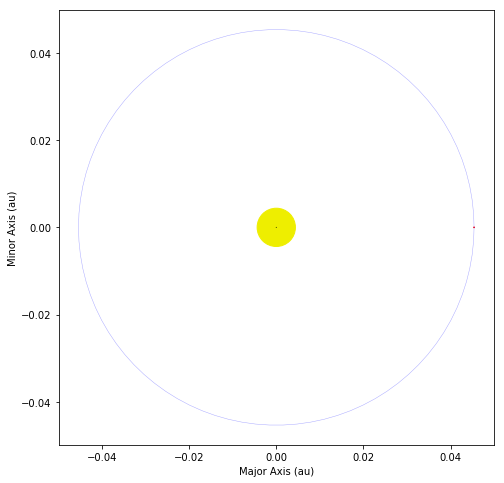

In [11]:
# orbital plot
t = np.arange(0,2*pi+(2*pi/90),2*pi/90)
x = a*np.cos(t)
y = b*np.sin(t)
plt.figure(figsize=(8,8))
plt.axes().set_aspect('equal')
plt.xlabel("Major Axis (au)")
plt.ylabel("Minor Axis (au)")
plt.plot(x,y,lw=.5,color='b',alpha=0.33)
sun = Circle((c,0),srad*solrad)
sun.set_color('#eeee00')
plt.axes().add_artist(sun)
wobble = ConnectionPatch((-tdepth/100*astamp,0),(tdepth/100*astamp,0),"data")
wobble.set_color('k')
plt.axes().add_artist(wobble)
planet = Circle((c+rp,0),prad*juprad)
planet.set_color('r')
plt.axes().add_artist(planet)
plt.show();
